In [47]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [48]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [ ]:
NUM_CLASSES = 6

# 入力長

In [50]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [51]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [52]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [54]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [55]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 24)                792       
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1097 (4.29 KB)
Trainable params: 1097 (4.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [57]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [58]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\Ck\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\Ck\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Ck\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Users\Ck\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Users\Ck\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3077, in run_cell

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3132, in _run_cell

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3336, in run_cell_async

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3519, in run_ast_nodes

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code

  File "C:\Users\Ck\AppData\Local\Temp\ipykernel_30864\2889966517.py", line 1, in <module>

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 2 3 2 2 2 0 1 0 0 3 3 0 2 3 0 1 4 5 0 5 5 1 3 2 3 2 0 3 0 1 4 0 1 0 3 1 1 3 1 0 3 3 2 1 1 5 4 2 4 1 0 3 5 1 1 2 1 2 1 1 1 0 3 1 2 3 0 0 3 2 3 3 1 0 1 1 2 4 1 0 2 3 1 2 3 4 1 0 0 5 3 1 5 0 1 3 1 2 2 2 3 4 3 1 1 1 3 3 0 2 4 5 3 3 0 3 3 4 1 1 3 2 0 0 1 0 4 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_159459]

In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 38ms/step
[5.6224889e-01 4.5786213e-14 1.2783163e-14 8.1353579e-03 4.2961577e-01]
0


# 混同行列

47/47 [==============================] - 0s 602us/step


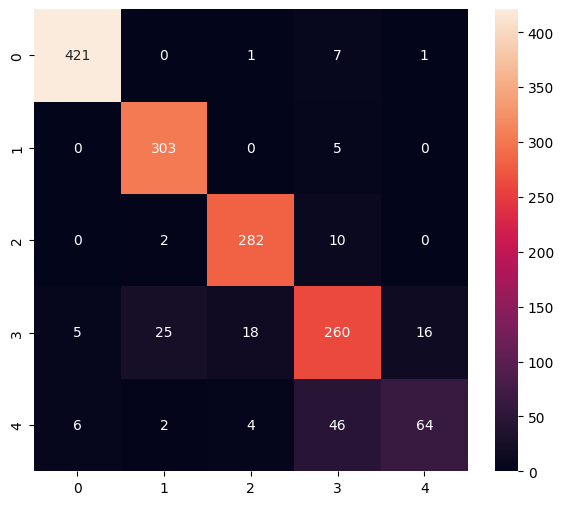

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       430
           1       0.91      0.98      0.95       308
           2       0.92      0.96      0.94       294
           3       0.79      0.80      0.80       324
           4       0.79      0.52      0.63       122

    accuracy                           0.90      1478
   macro avg       0.88      0.85      0.86      1478
weighted avg       0.90      0.90      0.90      1478



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [ ]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpr8luu2zw\assets


INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpr8luu2zw\assets


6504

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.6224912e-01 4.5786227e-14 1.2783167e-14 8.1353569e-03 4.2961553e-01]
0
